In [1]:
#importing libraries
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import RandomizedSearchCV as rs

import pickle

In [2]:
#loading dataset
flight_dataset=pd.read_excel('Flight_Ticket_Pricing_Data.xlsx')

In [3]:
flight_dataset.head()

,Unnamed: 0,Company,Departure time,Arrival time,Source,Destination,Duration time,Stops,Class,Date,Price
0,1,IndiGo,03:00,05:05,New Delhi,Kolkata,02 h 05 m,Non stop,E,"Sun, 1 May 22","₹ 7,319"
1,2,AirAsia,04:55,07:05,New Delhi,Kolkata,02 h 10 m,Non stop,E,"Sun, 1 May 22","₹ 7,319"
2,3,Go First,05:45,07:50,New Delhi,Kolkata,02 h 05 m,Non stop,E,"Sun, 1 May 22","₹ 7,319"
3,4,IndiGo,06:05,07:50,New Delhi,Kolkata,01 h 45 m,Non stop,E,"Sun, 1 May 22","₹ 7,319"
4,5,IndiGo,07:10,09:20,New Delhi,Kolkata,02 h 10 m,Non stop,E,"Sun, 1 May 22","₹ 7,319"


# Exploratory Data Analysis

In [4]:
# dropping serial number columns
flight_dataset.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
flight_dataset.tail()

,Company,Departure time,Arrival time,Source,Destination,Duration time,Stops,Class,Date,Price
5818,Air India,09:45,12:40,New Delhi,Chennai,02 h 55 m,Non stop,B,"Mon, 30 May 22","₹ 27,864"
5819,Vistara,13:30,16:20,New Delhi,Chennai,02 h 50 m,Non stop,B,"Mon, 30 May 22","₹ 27,864"
5820,Vistara,16:15,19:30,New Delhi,Chennai,03 h 15 m,Non stop,B,"Mon, 30 May 22","₹ 27,864"
5821,Air India,17:25,20:15,New Delhi,Chennai,02 h 50 m,Non stop,B,"Mon, 30 May 22","₹ 27,864"
5822,Air India,19:55,22:45,New Delhi,Chennai,02 h 50 m,Non stop,B,"Mon, 30 May 22","₹ 45,257"


In [6]:
flight_dataset.dtypes

Company           object
Departure time    object
Arrival time      object
Source            object
Destination       object
Duration time     object
Stops             object
Class             object
Date              object
Price             object
dtype: object

In [7]:
flight_dataset.shape

(5823, 10)

In [8]:
flight_dataset.isnull().sum()

Company           0
Departure time    1
Arrival time      1
Source            1
Destination       1
Duration time     1
Stops             1
Class             0
Date              0
Price             0
dtype: int64

In [9]:
flight_dataset.dropna(subset=['Departure time'],inplace=True)

In [10]:
flight_dataset.isnull().sum()

Company           0
Departure time    0
Arrival time      0
Source            0
Destination       0
Duration time     0
Stops             0
Class             0
Date              0
Price             0
dtype: int64

In [11]:
flight_dataset.nunique()

Company             7
Departure time    136
Arrival time      163
Source              1
Destination         3
Duration time     119
Stops              36
Class               3
Date               30
Price             444
dtype: int64

1. Removed null values
2. All the data is in ordinal form 
3. dataset has 5823 rows and 10 columns

In [12]:
#splitting the date column into weekday and date of journey
flight_dataset[["Weekday", "date_of_journey"]] = flight_dataset["Date"].str.split(",", expand = True)
print("\nNew DataFrame:")
flight_dataset.drop(columns=['Date'],inplace=True)
flight_dataset.head(6)


New DataFrame:


,Company,Departure time,Arrival time,Source,Destination,Duration time,Stops,Class,Price,Weekday,date_of_journey
0,IndiGo,03:00,05:05,New Delhi,Kolkata,02 h 05 m,Non stop,E,"₹ 7,319",Sun,1 May 22
1,AirAsia,04:55,07:05,New Delhi,Kolkata,02 h 10 m,Non stop,E,"₹ 7,319",Sun,1 May 22
2,Go First,05:45,07:50,New Delhi,Kolkata,02 h 05 m,Non stop,E,"₹ 7,319",Sun,1 May 22
3,IndiGo,06:05,07:50,New Delhi,Kolkata,01 h 45 m,Non stop,E,"₹ 7,319",Sun,1 May 22
4,IndiGo,07:10,09:20,New Delhi,Kolkata,02 h 10 m,Non stop,E,"₹ 7,319",Sun,1 May 22
5,SpiceJet,18:25,20:25,New Delhi,Kolkata,02 h,Non stop,E,"₹ 7,319",Sun,1 May 22


In [13]:
flight_dataset.head(6)

,Company,Departure time,Arrival time,Source,Destination,Duration time,Stops,Class,Price,Weekday,date_of_journey
0,IndiGo,03:00,05:05,New Delhi,Kolkata,02 h 05 m,Non stop,E,"₹ 7,319",Sun,1 May 22
1,AirAsia,04:55,07:05,New Delhi,Kolkata,02 h 10 m,Non stop,E,"₹ 7,319",Sun,1 May 22
2,Go First,05:45,07:50,New Delhi,Kolkata,02 h 05 m,Non stop,E,"₹ 7,319",Sun,1 May 22
3,IndiGo,06:05,07:50,New Delhi,Kolkata,01 h 45 m,Non stop,E,"₹ 7,319",Sun,1 May 22
4,IndiGo,07:10,09:20,New Delhi,Kolkata,02 h 10 m,Non stop,E,"₹ 7,319",Sun,1 May 22
5,SpiceJet,18:25,20:25,New Delhi,Kolkata,02 h,Non stop,E,"₹ 7,319",Sun,1 May 22


In [14]:
#splitting date of journey into day, month and year and dropping month and year
flight_dataset[['null',"day_of_journey","month","year"]] = flight_dataset["date_of_journey"].str.split(" ", expand = True)
print("\nNew DataFrame:")
flight_dataset.drop(columns=['date_of_journey','null','month','year','Source'],inplace=True)
flight_dataset.head(6)


New DataFrame:


,Company,Departure time,Arrival time,Destination,Duration time,Stops,Class,Price,Weekday,day_of_journey
0,IndiGo,03:00,05:05,Kolkata,02 h 05 m,Non stop,E,"₹ 7,319",Sun,1
1,AirAsia,04:55,07:05,Kolkata,02 h 10 m,Non stop,E,"₹ 7,319",Sun,1
2,Go First,05:45,07:50,Kolkata,02 h 05 m,Non stop,E,"₹ 7,319",Sun,1
3,IndiGo,06:05,07:50,Kolkata,01 h 45 m,Non stop,E,"₹ 7,319",Sun,1
4,IndiGo,07:10,09:20,Kolkata,02 h 10 m,Non stop,E,"₹ 7,319",Sun,1
5,SpiceJet,18:25,20:25,Kolkata,02 h,Non stop,E,"₹ 7,319",Sun,1


In [15]:
flight_dataset['Duration time'][100]

'02 h 10 m'

In [16]:
#splitting duration time into hours and mins 
flight_dataset[["hours", "min"]] = flight_dataset["Duration time"].str.split("h", expand = True)
print("\nNew DataFrame:")
flight_dataset.drop(columns=["Duration time"],inplace=True)
flight_dataset.head(6)


New DataFrame:


,Company,Departure time,Arrival time,Destination,Stops,Class,Price,Weekday,day_of_journey,hours,min
0,IndiGo,03:00,05:05,Kolkata,Non stop,E,"₹ 7,319",Sun,1,02,05 m
1,AirAsia,04:55,07:05,Kolkata,Non stop,E,"₹ 7,319",Sun,1,02,10 m
2,Go First,05:45,07:50,Kolkata,Non stop,E,"₹ 7,319",Sun,1,02,05 m
3,IndiGo,06:05,07:50,Kolkata,Non stop,E,"₹ 7,319",Sun,1,01,45 m
4,IndiGo,07:10,09:20,Kolkata,Non stop,E,"₹ 7,319",Sun,1,02,10 m
5,SpiceJet,18:25,20:25,Kolkata,Non stop,E,"₹ 7,319",Sun,1,02,


In [17]:
flight_dataset['min'].replace('',' 0 m',inplace=True)
flight_dataset.head(6)

,Company,Departure time,Arrival time,Destination,Stops,Class,Price,Weekday,day_of_journey,hours,min
0,IndiGo,03:00,05:05,Kolkata,Non stop,E,"₹ 7,319",Sun,1,02,05 m
1,AirAsia,04:55,07:05,Kolkata,Non stop,E,"₹ 7,319",Sun,1,02,10 m
2,Go First,05:45,07:50,Kolkata,Non stop,E,"₹ 7,319",Sun,1,02,05 m
3,IndiGo,06:05,07:50,Kolkata,Non stop,E,"₹ 7,319",Sun,1,01,45 m
4,IndiGo,07:10,09:20,Kolkata,Non stop,E,"₹ 7,319",Sun,1,02,10 m
5,SpiceJet,18:25,20:25,Kolkata,Non stop,E,"₹ 7,319",Sun,1,02,0 m


In [18]:
flight_dataset['min'][100]

' 10 m'

In [19]:
flight_dataset[['null1',"minutes", "null2"]] = flight_dataset["min"].str.split(" ", expand = True)
print("\nNew DataFrame:")
flight_dataset.drop(columns=["null1","min","null2"],inplace=True)
flight_dataset.head(6)


New DataFrame:


,Company,Departure time,Arrival time,Destination,Stops,Class,Price,Weekday,day_of_journey,hours,minutes
0,IndiGo,03:00,05:05,Kolkata,Non stop,E,"₹ 7,319",Sun,1,02,05
1,AirAsia,04:55,07:05,Kolkata,Non stop,E,"₹ 7,319",Sun,1,02,10
2,Go First,05:45,07:50,Kolkata,Non stop,E,"₹ 7,319",Sun,1,02,05
3,IndiGo,06:05,07:50,Kolkata,Non stop,E,"₹ 7,319",Sun,1,01,45
4,IndiGo,07:10,09:20,Kolkata,Non stop,E,"₹ 7,319",Sun,1,02,10
5,SpiceJet,18:25,20:25,Kolkata,Non stop,E,"₹ 7,319",Sun,1,02,0


In [20]:
#converting into numeric form
flight_dataset["day_of_journey"]=pd.to_numeric(flight_dataset["day_of_journey"])
flight_dataset["hours"]=pd.to_numeric(flight_dataset["hours"])
flight_dataset["minutes"]=pd.to_numeric(flight_dataset["minutes"])
flight_dataset.dtypes

Company           object
Departure time    object
Arrival time      object
Destination       object
Stops             object
Class             object
Price             object
Weekday           object
day_of_journey     int64
hours              int64
minutes            int64
dtype: object

In [21]:
#converting hours into minutes format
flight_dataset["hours"] = 60 * flight_dataset["hours"]
flight_dataset.head()

,Company,Departure time,Arrival time,Destination,Stops,Class,Price,Weekday,day_of_journey,hours,minutes
0,IndiGo,03:00,05:05,Kolkata,Non stop,E,"₹ 7,319",Sun,1,120,5
1,AirAsia,04:55,07:05,Kolkata,Non stop,E,"₹ 7,319",Sun,1,120,10
2,Go First,05:45,07:50,Kolkata,Non stop,E,"₹ 7,319",Sun,1,120,5
3,IndiGo,06:05,07:50,Kolkata,Non stop,E,"₹ 7,319",Sun,1,60,45
4,IndiGo,07:10,09:20,Kolkata,Non stop,E,"₹ 7,319",Sun,1,120,10


In [22]:
#clubbing hours and minutes
flight_dataset['Duration_in_minutes']=flight_dataset['hours']+flight_dataset['minutes']
flight_dataset.drop(columns=["hours","minutes"],inplace=True)
flight_dataset.head()

,Company,Departure time,Arrival time,Destination,Stops,Class,Price,Weekday,day_of_journey,Duration_in_minutes
0,IndiGo,03:00,05:05,Kolkata,Non stop,E,"₹ 7,319",Sun,1,125
1,AirAsia,04:55,07:05,Kolkata,Non stop,E,"₹ 7,319",Sun,1,130
2,Go First,05:45,07:50,Kolkata,Non stop,E,"₹ 7,319",Sun,1,125
3,IndiGo,06:05,07:50,Kolkata,Non stop,E,"₹ 7,319",Sun,1,105
4,IndiGo,07:10,09:20,Kolkata,Non stop,E,"₹ 7,319",Sun,1,130


In [23]:
#converting price into numerical form
flight_dataset["Price"] = flight_dataset["Price"].str.replace(',', '')
flight_dataset["Price"] = flight_dataset["Price"].str.replace('₹', '')
flight_dataset.head()

,Company,Departure time,Arrival time,Destination,Stops,Class,Price,Weekday,day_of_journey,Duration_in_minutes
0,IndiGo,03:00,05:05,Kolkata,Non stop,E,7319,Sun,1,125
1,AirAsia,04:55,07:05,Kolkata,Non stop,E,7319,Sun,1,130
2,Go First,05:45,07:50,Kolkata,Non stop,E,7319,Sun,1,125
3,IndiGo,06:05,07:50,Kolkata,Non stop,E,7319,Sun,1,105
4,IndiGo,07:10,09:20,Kolkata,Non stop,E,7319,Sun,1,130


In [24]:
#simplifying Departure and Arrival time by splitting them to two subsets
flight_dataset[["Dep_hour", "Dep_mins"]] = flight_dataset["Departure time"].str.split(":", expand = True)
flight_dataset[["Arr_hour", "Arr_mins"]] = flight_dataset["Arrival time"].str.split(":", expand = True)
print("\nNew DataFrame:")
flight_dataset.head(6)


New DataFrame:


,Company,Departure time,Arrival time,Destination,Stops,Class,Price,Weekday,day_of_journey,Duration_in_minutes,Dep_hour,Dep_mins,Arr_hour,Arr_mins
0,IndiGo,03:00,05:05,Kolkata,Non stop,E,7319,Sun,1,125,03,00,05,05
1,AirAsia,04:55,07:05,Kolkata,Non stop,E,7319,Sun,1,130,04,55,07,05
2,Go First,05:45,07:50,Kolkata,Non stop,E,7319,Sun,1,125,05,45,07,50
3,IndiGo,06:05,07:50,Kolkata,Non stop,E,7319,Sun,1,105,06,05,07,50
4,IndiGo,07:10,09:20,Kolkata,Non stop,E,7319,Sun,1,130,07,10,09,20
5,SpiceJet,18:25,20:25,Kolkata,Non stop,E,7319,Sun,1,120,18,25,20,25


In [25]:
#converting into numerical form
flight_dataset["Dep_hour"]=pd.to_numeric(flight_dataset["Dep_hour"])
flight_dataset["Dep_mins"]=pd.to_numeric(flight_dataset["Dep_mins"])
flight_dataset["Arr_hour"]=pd.to_numeric(flight_dataset["Arr_hour"])
flight_dataset["Arr_mins"]=pd.to_numeric(flight_dataset["Arr_mins"])
flight_dataset.head(6)

,Company,Departure time,Arrival time,Destination,Stops,Class,Price,Weekday,day_of_journey,Duration_in_minutes,Dep_hour,Dep_mins,Arr_hour,Arr_mins
0,IndiGo,03:00,05:05,Kolkata,Non stop,E,7319,Sun,1,125,3,0,5,5
1,AirAsia,04:55,07:05,Kolkata,Non stop,E,7319,Sun,1,130,4,55,7,5
2,Go First,05:45,07:50,Kolkata,Non stop,E,7319,Sun,1,125,5,45,7,50
3,IndiGo,06:05,07:50,Kolkata,Non stop,E,7319,Sun,1,105,6,5,7,50
4,IndiGo,07:10,09:20,Kolkata,Non stop,E,7319,Sun,1,130,7,10,9,20
5,SpiceJet,18:25,20:25,Kolkata,Non stop,E,7319,Sun,1,120,18,25,20,25


In [26]:
flight_dataset.drop(columns=['Departure time','Arrival time'],inplace=True)
flight_dataset.head(6)

,Company,Destination,Stops,Class,Price,Weekday,day_of_journey,Duration_in_minutes,Dep_hour,Dep_mins,Arr_hour,Arr_mins
0,IndiGo,Kolkata,Non stop,E,7319,Sun,1,125,3,0,5,5
1,AirAsia,Kolkata,Non stop,E,7319,Sun,1,130,4,55,7,5
2,Go First,Kolkata,Non stop,E,7319,Sun,1,125,5,45,7,50
3,IndiGo,Kolkata,Non stop,E,7319,Sun,1,105,6,5,7,50
4,IndiGo,Kolkata,Non stop,E,7319,Sun,1,130,7,10,9,20
5,SpiceJet,Kolkata,Non stop,E,7319,Sun,1,120,18,25,20,25


In [27]:
flight_dataset.Stops.value_counts()

Non stop                           4953
1 stop via Mumbai                   138
1 stop via Hyderabad                 95
1 stop via Indore                    73
1 stop via Bengaluru                 62
1 stop via Aurangabad                46
1 stop via Varanasi                  44
1 stop via Jharsuguda                41
1 stop via Ranchi                    40
1 stop via Goa                       33
1 stop via Kolkata                   28
1 stop via Rajkot                    26
1 stop via Guwahati                  24
1 stop via Srinagar                  21
1 stop via Bhopal                    20
1 stop via Ahmedabad                 15
1 stop via Nagpur                    14
1 stop via Jaipur                    14
1 stop via Gorakhpur                 14
1 stop via Vadodara                  13
1 stop via Bagdogra                  12
1 stop via Chennai                   11
1 stop via Amritsar                  11
1 stop via Pune                      11
1 stop via Darbhanga                 10


In [28]:
#simplifying stops columns
flight_dataset[['stops',"stoppage"]] = flight_dataset["Stops"].str.split(" ", 1, expand = True)
print("\nNew DataFrame:")
flight_dataset.drop(columns=["Stops","stoppage"],inplace=True)
flight_dataset.head(6)


New DataFrame:


,Company,Destination,Class,Price,Weekday,day_of_journey,Duration_in_minutes,Dep_hour,Dep_mins,Arr_hour,Arr_mins,stops
0,IndiGo,Kolkata,E,7319,Sun,1,125,3,0,5,5,Non
1,AirAsia,Kolkata,E,7319,Sun,1,130,4,55,7,5,Non
2,Go First,Kolkata,E,7319,Sun,1,125,5,45,7,50,Non
3,IndiGo,Kolkata,E,7319,Sun,1,105,6,5,7,50,Non
4,IndiGo,Kolkata,E,7319,Sun,1,130,7,10,9,20,Non
5,SpiceJet,Kolkata,E,7319,Sun,1,120,18,25,20,25,Non


In [29]:
flight_dataset["stops"] = flight_dataset["stops"].str.replace('Non', '0')
flight_dataset.head(6)

,Company,Destination,Class,Price,Weekday,day_of_journey,Duration_in_minutes,Dep_hour,Dep_mins,Arr_hour,Arr_mins,stops
0,IndiGo,Kolkata,E,7319,Sun,1,125,3,0,5,5,0
1,AirAsia,Kolkata,E,7319,Sun,1,130,4,55,7,5,0
2,Go First,Kolkata,E,7319,Sun,1,125,5,45,7,50,0
3,IndiGo,Kolkata,E,7319,Sun,1,105,6,5,7,50,0
4,IndiGo,Kolkata,E,7319,Sun,1,130,7,10,9,20,0
5,SpiceJet,Kolkata,E,7319,Sun,1,120,18,25,20,25,0


In [30]:
flight_dataset["stops"]=pd.to_numeric(flight_dataset["stops"])

In [31]:
for i in flight_dataset:
    print(flight_dataset[i].value_counts(),'\n\n')

Vistara             2138
IndiGo              1263
Air India           1070
SpiceJet             741
Go First             412
AirAsia              196
Go First, IndiGo       2
Name: Company, dtype: int64 


Mumbai     3166
Kolkata    1493
Chennai    1163
Name: Destination, dtype: int64 


E     3337
B     1363
PE    1122
Name: Class, dtype: int64 


 7319     658
 5849     577
 22152    331
 7321     199
 8159     171
         ... 
 47857      1
 52089      1
 61353      1
 12935      1
 7790       1
Name: Price, Length: 444, dtype: int64 


Sun    988
Mon    962
Fri    796
Sat    785
Wed    775
Thu    775
Tue    741
Name: Weekday, dtype: int64 


1     208
4     207
6     207
14    206
8     203
13    202
5     200
11    198
30    198
29    197
20    196
12    196
9     195
3     194
28    193
22    193
21    193
16    193
7     193
19    192
27    191
24    190
23    189
18    188
2     187
26    187
15    187
17    186
25    182
10    171
Name: day_of_journey, dtype: int64 


130    

In [32]:
flight_dataset["Company"] = flight_dataset["Company"].str.replace('Go First, IndiGo', 'IndiGo')
flight_dataset["Company"].value_counts()

Vistara      2138
IndiGo       1265
Air India    1070
SpiceJet      741
Go First      412
AirAsia       196
Name: Company, dtype: int64

In [33]:
flight_dataset.dtypes

Company                object
Destination            object
Class                  object
Price                  object
Weekday                object
day_of_journey          int64
Duration_in_minutes     int64
Dep_hour                int64
Dep_mins                int64
Arr_hour                int64
Arr_mins                int64
stops                   int64
dtype: object

In [34]:
flight_dataset["Price"]=pd.to_numeric(flight_dataset["Price"])

In [35]:
flight_dataset.nunique()

Company                  6
Destination              3
Class                    3
Price                  444
Weekday                  7
day_of_journey          30
Duration_in_minutes    119
Dep_hour                24
Dep_mins                12
Arr_hour                22
Arr_mins                12
stops                    3
dtype: int64

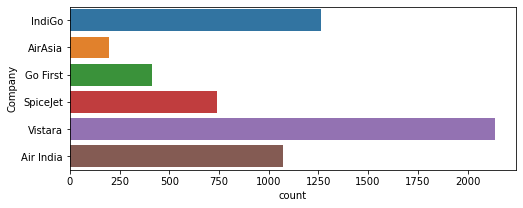

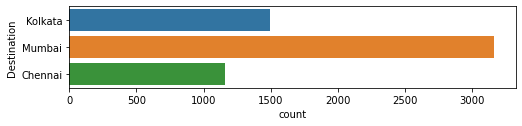

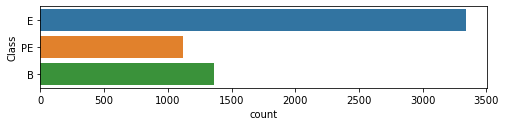

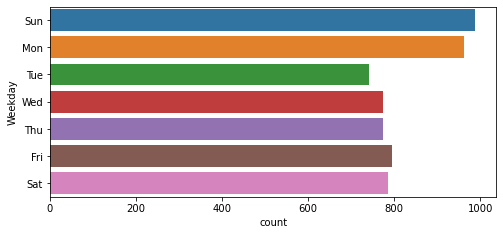

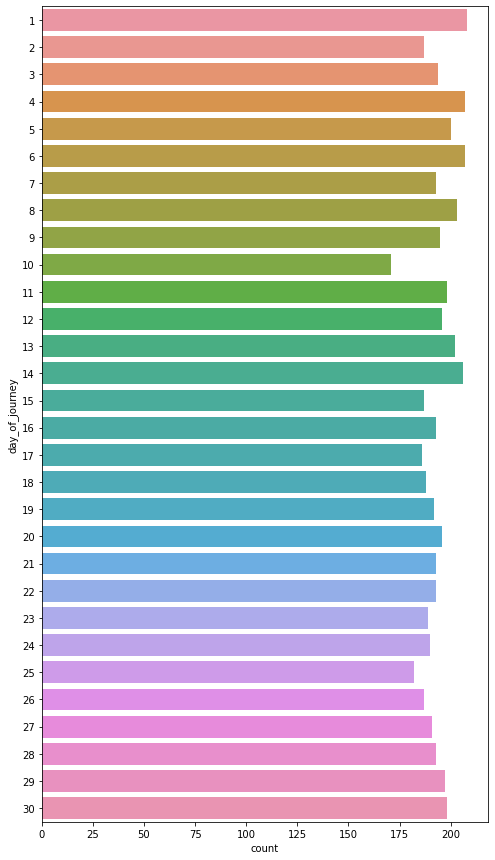

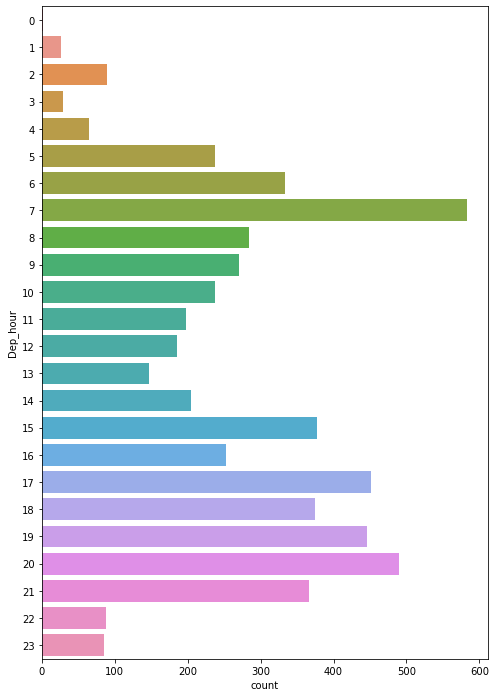

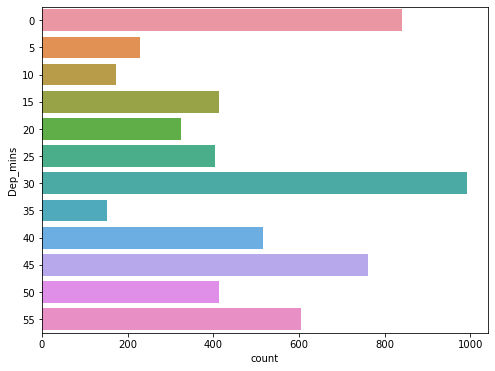

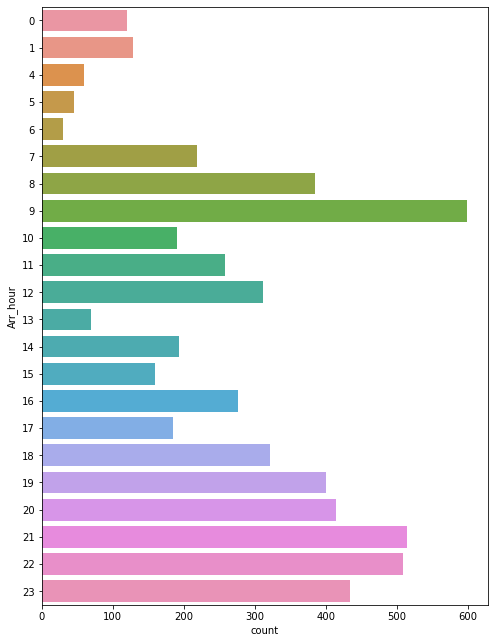

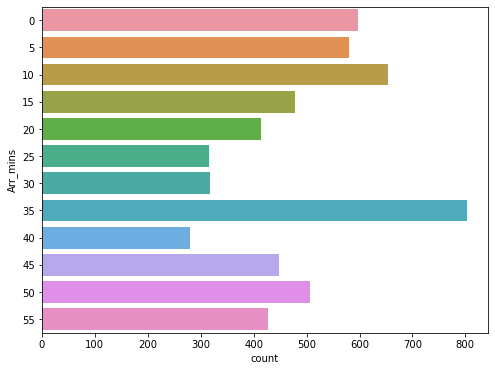

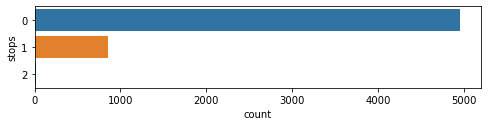

In [36]:
for i in flight_dataset:
    z=flight_dataset[i].nunique()
    if z<=30:
        plt.figure(figsize = (8,z/2))
        sns.countplot(y=i ,data=flight_dataset)

Text(0.5, 1.0, 'Price of Ticket datewise')

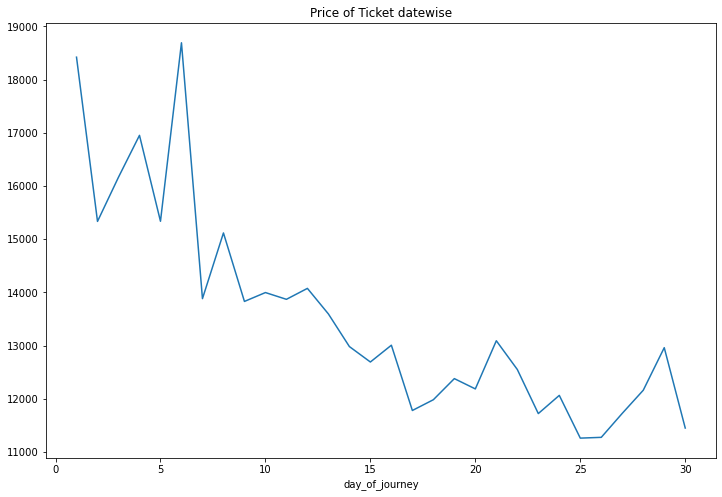

In [37]:
byDate=flight_dataset.groupby('day_of_journey').mean()
plt.figure(figsize=(12,8))
byDate['Price'].plot()
plt.title('Price of Ticket datewise')

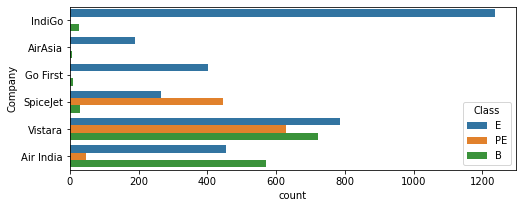

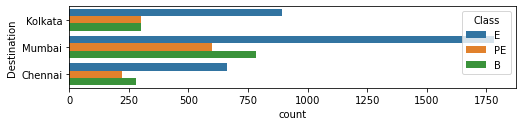

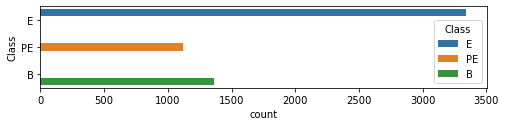

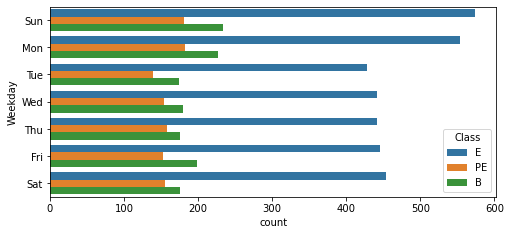

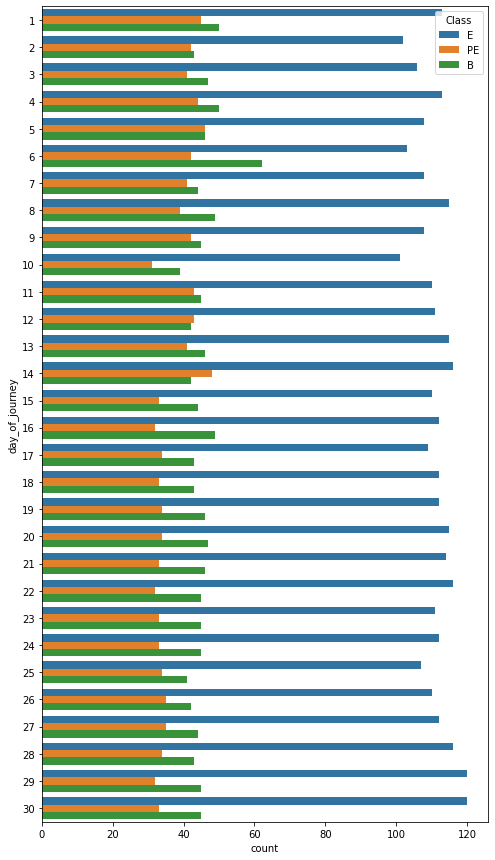

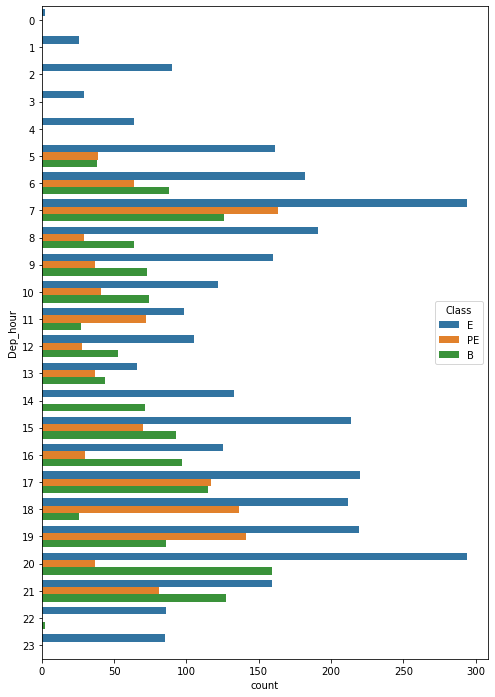

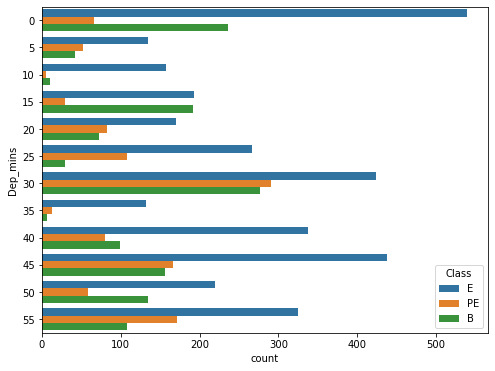

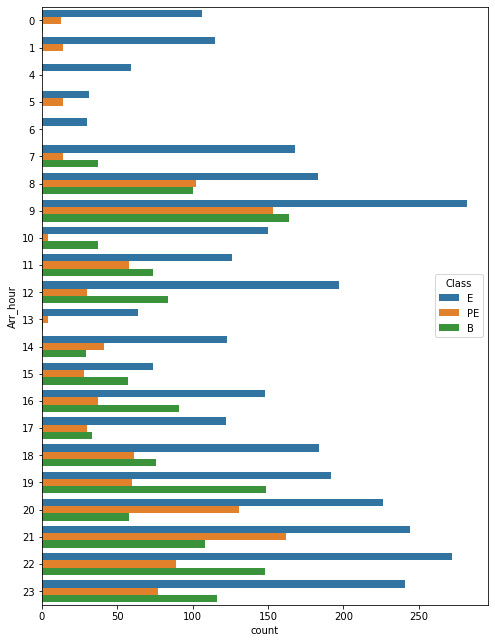

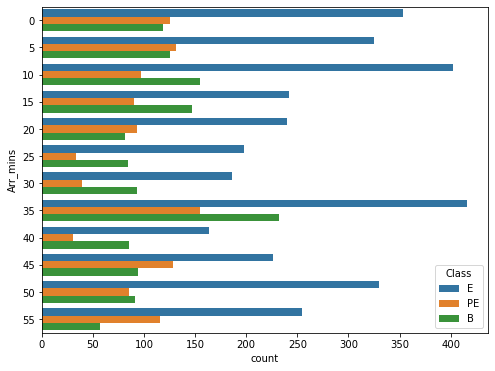

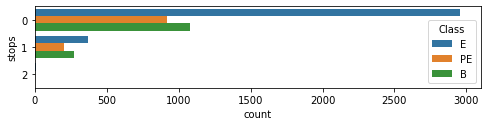

In [38]:
for i in flight_dataset:
    z=flight_dataset[i].nunique()
    if z<=30:
        plt.figure(figsize = (8,z/2))
        sns.countplot(y=i, hue= 'Class', data=flight_dataset)


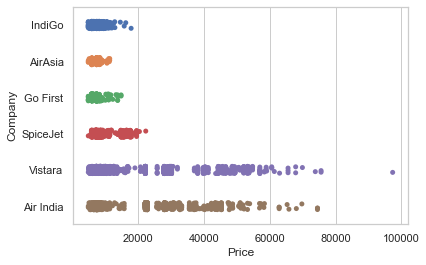

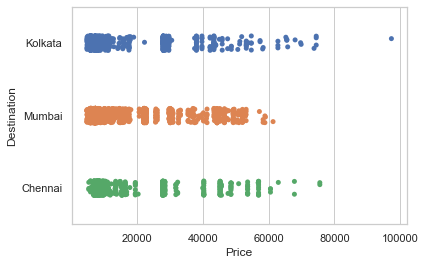

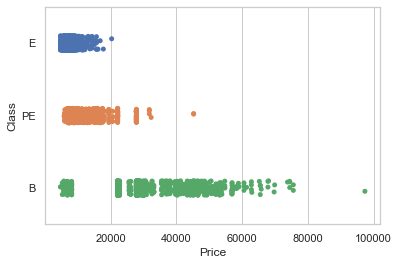

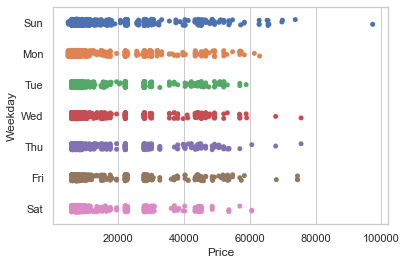

In [39]:
x=['Company','Destination','Class','Weekday']
for i in x:
    z=flight_dataset[i].nunique()
    if z<=30:
        sns.set(style = 'whitegrid')         
        sns.stripplot(y=i ,x="Price", data=flight_dataset)  
        plt.show()

<AxesSubplot:xlabel='Price', ylabel='Weekday'>

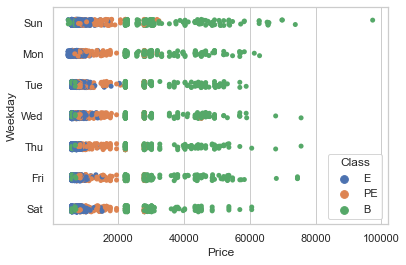

In [40]:
sns.set(style = 'whitegrid')         
sns.stripplot(y='Weekday',hue='Class' ,x="Price", data=flight_dataset)  

<AxesSubplot:xlabel='Price', ylabel='Company'>

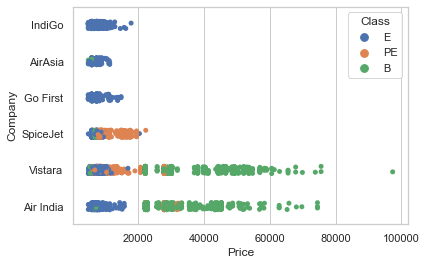

In [41]:
sns.set(style = 'whitegrid')         
sns.stripplot(y='Company',hue='Class' ,x="Price", data=flight_dataset)  

<AxesSubplot:xlabel='Price', ylabel='Destination'>

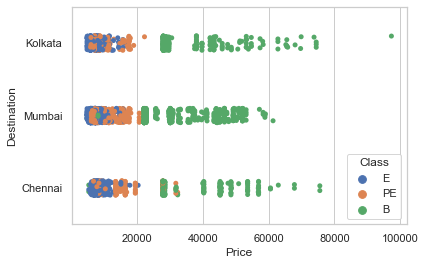

In [42]:
sns.set(style = 'whitegrid')         
sns.stripplot(y='Destination',hue='Class' ,x="Price", data=flight_dataset)

In [43]:
flight_dataset['Weekday_in_numbers']=flight_dataset['Weekday']
flight_dataset["Weekday_in_numbers"] = flight_dataset["Weekday_in_numbers"].str.replace('Sun', '1')
flight_dataset["Weekday_in_numbers"] = flight_dataset["Weekday_in_numbers"].str.replace('Mon', '2')
flight_dataset["Weekday_in_numbers"] = flight_dataset["Weekday_in_numbers"].str.replace('Tue', '3')
flight_dataset["Weekday_in_numbers"] = flight_dataset["Weekday_in_numbers"].str.replace('Wed', '4')
flight_dataset["Weekday_in_numbers"] = flight_dataset["Weekday_in_numbers"].str.replace('Thu', '5')
flight_dataset["Weekday_in_numbers"] = flight_dataset["Weekday_in_numbers"].str.replace('Fri', '6')
flight_dataset["Weekday_in_numbers"] = flight_dataset["Weekday_in_numbers"].str.replace('Sat', '7')

Text(0.5, 1.0, 'Price of Ticket weekday wise')

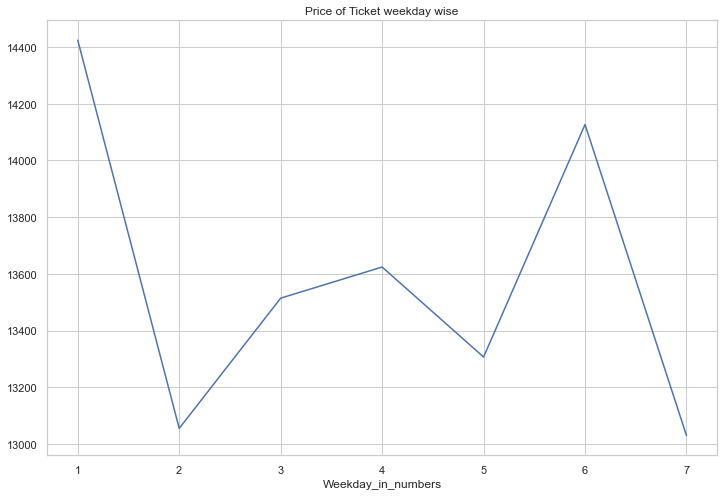

In [44]:
byDate=flight_dataset.groupby('Weekday_in_numbers').mean()
plt.figure(figsize=(12,8))
byDate['Price'].plot()
plt.title('Price of Ticket weekday wise')

In [45]:
flight_dataset.tail()

,Company,Destination,Class,Price,Weekday,day_of_journey,Duration_in_minutes,Dep_hour,Dep_mins,Arr_hour,Arr_mins,stops,Weekday_in_numbers
5818,Air India,Chennai,B,27864,Mon,30,175,9,45,12,40,0,2
5819,Vistara,Chennai,B,27864,Mon,30,170,13,30,16,20,0,2
5820,Vistara,Chennai,B,27864,Mon,30,195,16,15,19,30,0,2
5821,Air India,Chennai,B,27864,Mon,30,170,17,25,20,15,0,2
5822,Air India,Chennai,B,45257,Mon,30,170,19,55,22,45,0,2


In [46]:
flight_dataset['stops'].replace(2,np.nan,inplace=True)
flight_dataset.dropna(subset=['stops'],inplace=True)
flight_dataset.drop(columns=['Weekday_in_numbers'],inplace=True)

In [47]:
flight_dataset.head()

,Company,Destination,Class,Price,Weekday,day_of_journey,Duration_in_minutes,Dep_hour,Dep_mins,Arr_hour,Arr_mins,stops
0,IndiGo,Kolkata,E,7319,Sun,1,125,3,0,5,5,0.0
1,AirAsia,Kolkata,E,7319,Sun,1,130,4,55,7,5,0.0
2,Go First,Kolkata,E,7319,Sun,1,125,5,45,7,50,0.0
3,IndiGo,Kolkata,E,7319,Sun,1,105,6,5,7,50,0.0
4,IndiGo,Kolkata,E,7319,Sun,1,130,7,10,9,20,0.0


In [48]:
le=LabelEncoder()
for i in flight_dataset:
    if flight_dataset[i].dtype=='object':
         flight_dataset[i]=le.fit_transform(flight_dataset[i])

In [49]:
flight_dataset.dtypes

Company                  int32
Destination              int32
Class                    int32
Price                    int64
Weekday                  int32
day_of_journey           int64
Duration_in_minutes      int64
Dep_hour                 int64
Dep_mins                 int64
Arr_hour                 int64
Arr_mins                 int64
stops                  float64
dtype: object

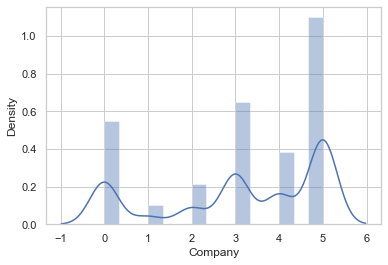

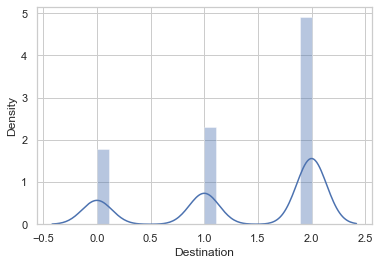

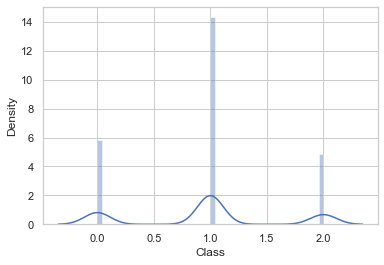

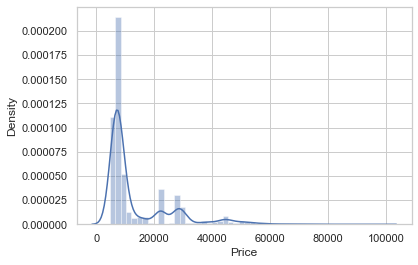

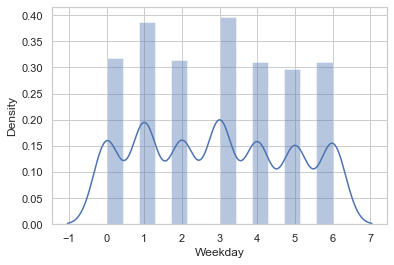

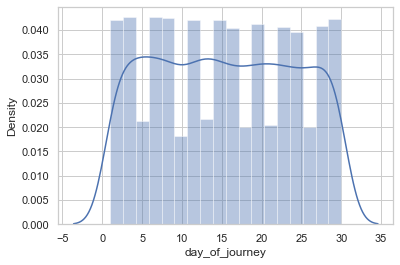

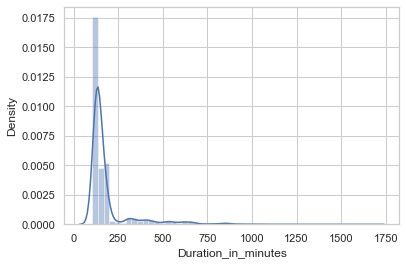

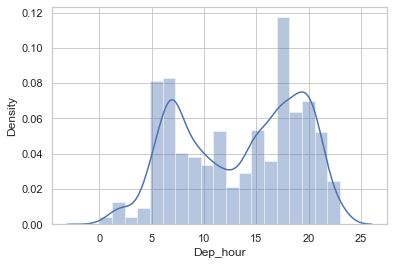

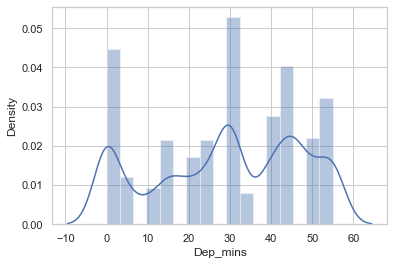

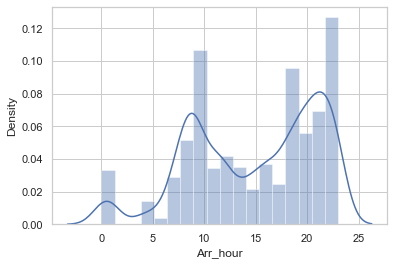

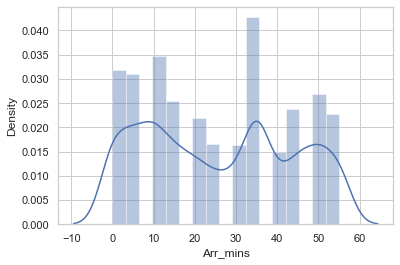

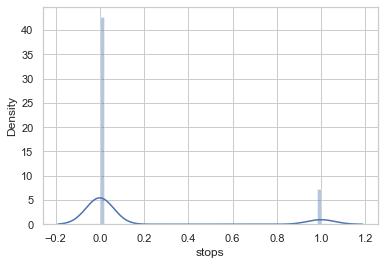

In [50]:
for j in flight_dataset:
    sns.distplot(flight_dataset[j])
    plt.show()

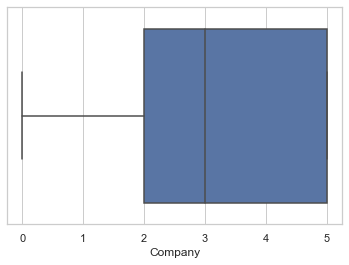

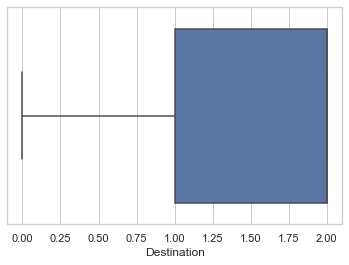

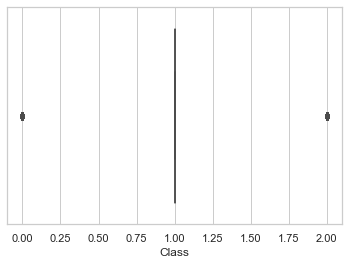

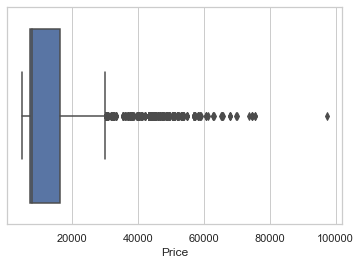

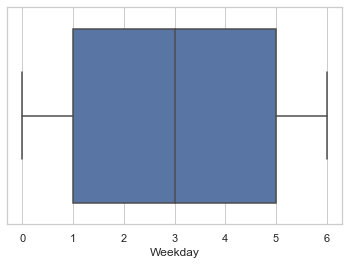

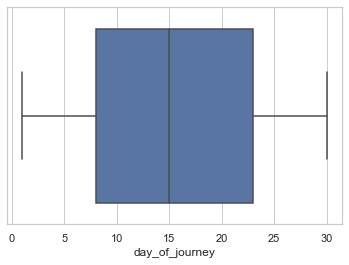

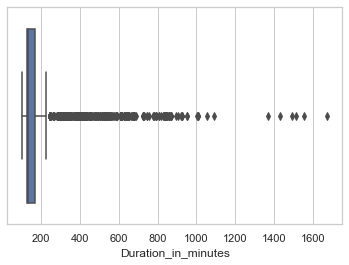

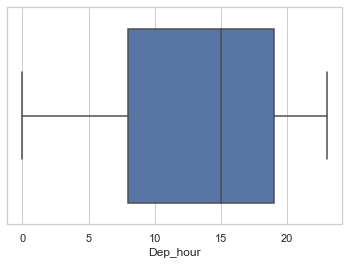

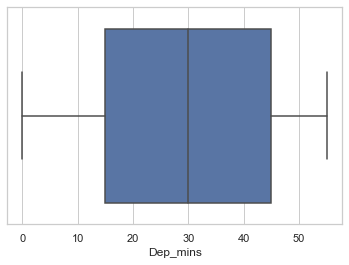

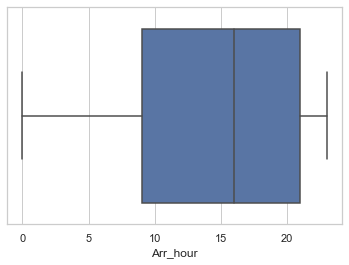

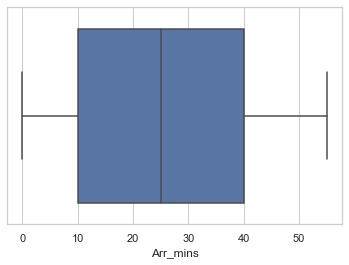

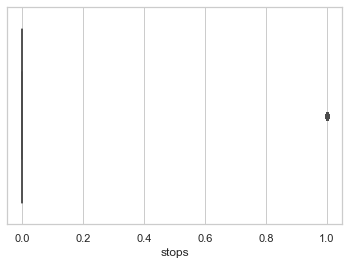

In [51]:
for k in flight_dataset:
    sns.boxplot(flight_dataset[k])
    plt.show()

In [52]:
#arresting the outliers using IQR method
def out(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    whisker_width = 1.5
    news_outliers = df[(df[col] < Q1 - whisker_width*IQR) | (df[col] > Q3 + whisker_width*IQR)]
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    df[col]=np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

In [53]:
out(flight_dataset,'Duration_in_minutes')
out(flight_dataset,'Price')

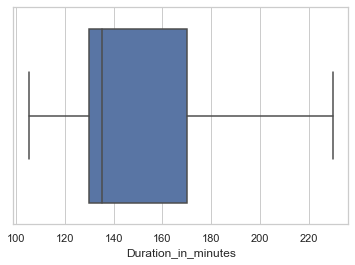

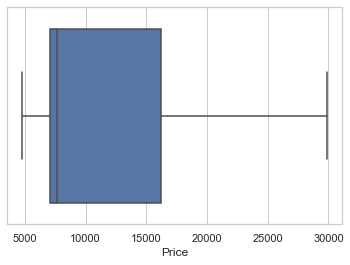

In [54]:
sns.boxplot(flight_dataset['Duration_in_minutes'])
plt.show()
sns.boxplot(flight_dataset['Price'])
plt.show()

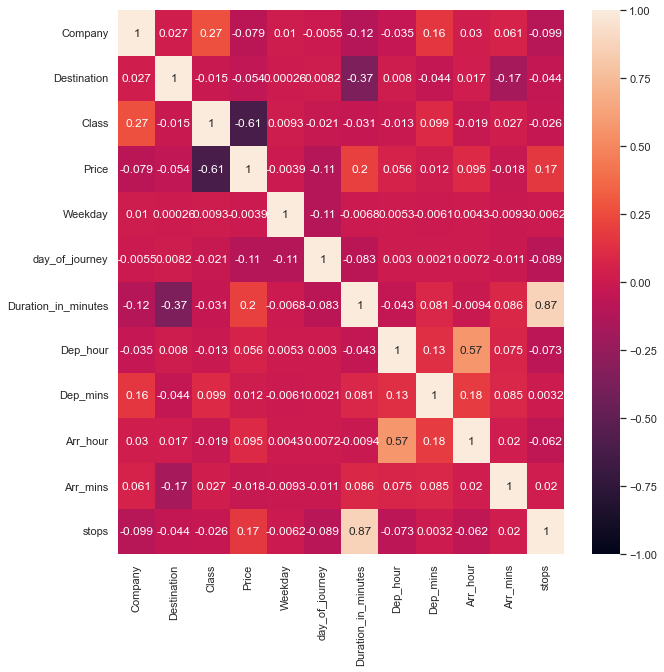

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(flight_dataset.corr(),vmin=-1,vmax=1, annot=True)
plt.show()

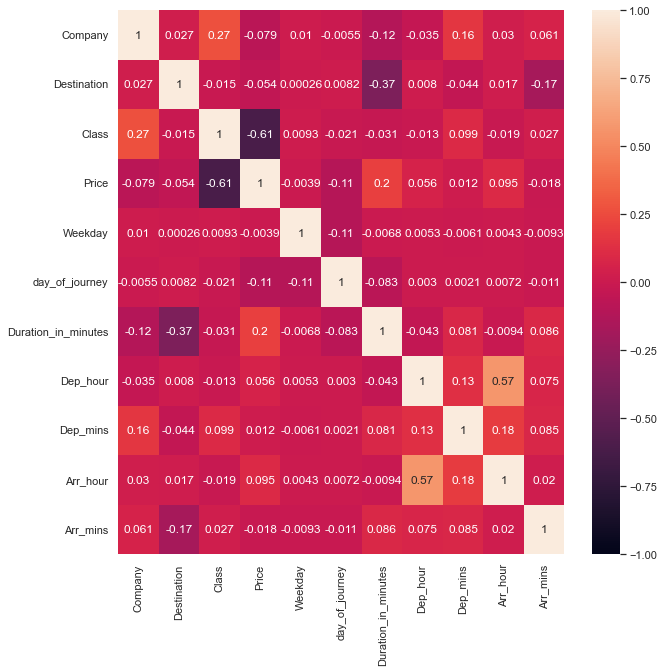

In [58]:
flight_dataset.drop(columns=['stops'],inplace=True)
plt.figure(figsize=(10,10))
sns.heatmap(flight_dataset.corr(),vmin=-1,vmax=1, annot=True)
plt.show()

Observation:
1.	Vistara has a greater number of flights from Delhi to mentioned cities followed by Indigo, Air Asia has very a smaller number of flights compared to all the other airlines.
2.	Delhi to Mumbai has maximum number of flights from Delhi followed by Kolkata and then Chennai
3.	Economy Class is the majority class of all followed by Business and Premium Economy.
4.	Sunday and Monday have majority reservation and Tuesday has the minimum of all the weekdays.
5.	All the days of the month has even number of reservations except for 10th of the month.
6.	Early morning and mid night Departure have less traffic, evening and morning has maximum traffic.
7.	Morning 9AM and late night from 9PM to 11PM have the maximum arrival of flights.
8.	5/6th of the flights are non-stop flights.
9.	The price of the ticket is high if the number of days between the date of booking and date of journey is less.
10.	 Vistara and Air India are the only air companies to have maximum business class seats. Indigo has the majority, Economy Class. Air Asia has the less travelling flights.
11.	 Flights from Delhi to Mumbai are high in number compared to other two cities.
12.	 Vistara and Air India ticket price are the highest and Air Asia has the lowest.
13.	 Business class tickets are comparatively higher than the other two classes.
14.	 Travelling on Sunday and Friday is way more expensive than other week days.
15.	 Price and Duration of Flight has outliers.
16.	 Class and Price have high correlativity followed by flight duration time.
17.	 XGB Regression has the best fit of all the machine learning models. 


In [59]:
X=flight_dataset.drop(columns=['Price'])
Y=flight_dataset['Price']

In [60]:
scalar= StandardScaler()
X_scaled= scalar.fit_transform(X)

In [61]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
  
vif_data

,feature,VIF
0,Company,1.125953
1,Destination,1.185131
2,Class,1.082971
3,Weekday,1.012613
4,day_of_journey,1.020748
5,Duration_in_minutes,1.195959
6,Dep_hour,1.505114
7,Dep_mins,1.082482
8,Arr_hour,1.517011
9,Arr_mins,1.048908


In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y, test_size= 0.2, random_state=5)

In [64]:
CV=KFold(n_splits=10, random_state=10, shuffle=True)

In [65]:
xgb=XGBRegressor()
param_grid = {
    'n_estimators': [250,300,350],
    'max_depth': [6,7,9],
    'learning_rate':[0.01,0.1,0.2],
    'gamma':[0.0,0.1,0.2,0.3],
    'n_jobs':[200,300]
}
CV_xgb = gs(xgb,param_grid=param_grid,scoring ='r2',cv=CV,verbose=5)
CV_xgb.fit(X_train,Y_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
[CV 1/10] END gamma=0.0, learning_rate=0.01, max_depth=6, n_estimators=250, n_jobs=200;, score=0.917 total time=   1.0s
[CV 2/10] END gamma=0.0, learning_rate=0.01, max_depth=6, n_estimators=250, n_jobs=200;, score=0.909 total time=   0.9s
[CV 3/10] END gamma=0.0, learning_rate=0.01, max_depth=6, n_estimators=250, n_jobs=200;, score=0.923 total time=   0.9s
[CV 4/10] END gamma=0.0, learning_rate=0.01, max_depth=6, n_estimators=250, n_jobs=200;, score=0.945 total time=   0.9s
[CV 5/10] END gamma=0.0, learning_rate=0.01, max_depth=6, n_estimators=250, n_jobs=200;, score=0.910 total time=   0.9s
[CV 6/10] END gamma=0.0, learning_rate=0.01, max_depth=6, n_estimators=250, n_jobs=200;, score=0.949 total time=   0.9s
[CV 7/10] END gamma=0.0, learning_rate=0.01, max_depth=6, n_estimators=250, n_jobs=200;, score=0.915 total time=   0.9s
[CV 8/10] END gamma=0.0, learning_rate=0.01, max_depth=6, n_estimators=250, n_jobs=200;, score=

[CV 9/10] END gamma=0.0, learning_rate=0.01, max_depth=7, n_estimators=250, n_jobs=200;, score=0.941 total time=   1.2s
[CV 10/10] END gamma=0.0, learning_rate=0.01, max_depth=7, n_estimators=250, n_jobs=200;, score=0.938 total time=   1.2s
[CV 1/10] END gamma=0.0, learning_rate=0.01, max_depth=7, n_estimators=250, n_jobs=300;, score=0.920 total time=   1.7s
[CV 2/10] END gamma=0.0, learning_rate=0.01, max_depth=7, n_estimators=250, n_jobs=300;, score=0.919 total time=   1.6s
[CV 3/10] END gamma=0.0, learning_rate=0.01, max_depth=7, n_estimators=250, n_jobs=300;, score=0.927 total time=   1.6s
[CV 4/10] END gamma=0.0, learning_rate=0.01, max_depth=7, n_estimators=250, n_jobs=300;, score=0.948 total time=   1.6s
[CV 5/10] END gamma=0.0, learning_rate=0.01, max_depth=7, n_estimators=250, n_jobs=300;, score=0.916 total time=   1.5s
[CV 6/10] END gamma=0.0, learning_rate=0.01, max_depth=7, n_estimators=250, n_jobs=300;, score=0.951 total time=   1.6s
[CV 7/10] END gamma=0.0, learning_rate=

[CV 8/10] END gamma=0.0, learning_rate=0.01, max_depth=9, n_estimators=250, n_jobs=300;, score=0.935 total time=   2.4s
[CV 9/10] END gamma=0.0, learning_rate=0.01, max_depth=9, n_estimators=250, n_jobs=300;, score=0.940 total time=   2.4s
[CV 10/10] END gamma=0.0, learning_rate=0.01, max_depth=9, n_estimators=250, n_jobs=300;, score=0.943 total time=   2.4s
[CV 1/10] END gamma=0.0, learning_rate=0.01, max_depth=9, n_estimators=300, n_jobs=200;, score=0.946 total time=   2.2s
[CV 2/10] END gamma=0.0, learning_rate=0.01, max_depth=9, n_estimators=300, n_jobs=200;, score=0.937 total time=   2.5s
[CV 3/10] END gamma=0.0, learning_rate=0.01, max_depth=9, n_estimators=300, n_jobs=200;, score=0.945 total time=   2.4s
[CV 4/10] END gamma=0.0, learning_rate=0.01, max_depth=9, n_estimators=300, n_jobs=200;, score=0.962 total time=   2.5s
[CV 5/10] END gamma=0.0, learning_rate=0.01, max_depth=9, n_estimators=300, n_jobs=200;, score=0.932 total time=   2.5s
[CV 6/10] END gamma=0.0, learning_rate=

[CV 7/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=200;, score=0.952 total time=   1.3s
[CV 8/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=200;, score=0.966 total time=   1.3s
[CV 9/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=200;, score=0.970 total time=   1.3s
[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=200;, score=0.960 total time=   1.3s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=300;, score=0.966 total time=   1.6s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=300;, score=0.946 total time=   1.6s
[CV 3/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=300;, score=0.955 total time=   1.6s
[CV 4/10] END gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=300;, score=0.969 total time=   1.6s
[CV 5/10] END gamma=0.0, learning_rate=0.1, max

[CV 6/10] END gamma=0.0, learning_rate=0.1, max_depth=7, n_estimators=300, n_jobs=300;, score=0.968 total time=   2.3s
[CV 7/10] END gamma=0.0, learning_rate=0.1, max_depth=7, n_estimators=300, n_jobs=300;, score=0.948 total time=   2.3s
[CV 8/10] END gamma=0.0, learning_rate=0.1, max_depth=7, n_estimators=300, n_jobs=300;, score=0.967 total time=   2.3s
[CV 9/10] END gamma=0.0, learning_rate=0.1, max_depth=7, n_estimators=300, n_jobs=300;, score=0.968 total time=   2.3s
[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=7, n_estimators=300, n_jobs=300;, score=0.959 total time=   2.4s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=7, n_estimators=350, n_jobs=200;, score=0.959 total time=   1.9s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max_depth=7, n_estimators=350, n_jobs=200;, score=0.944 total time=   2.1s
[CV 3/10] END gamma=0.0, learning_rate=0.1, max_depth=7, n_estimators=350, n_jobs=200;, score=0.955 total time=   2.1s
[CV 4/10] END gamma=0.0, learning_rate=0.1, max

[CV 5/10] END gamma=0.0, learning_rate=0.1, max_depth=9, n_estimators=350, n_jobs=200;, score=0.930 total time=   4.3s
[CV 6/10] END gamma=0.0, learning_rate=0.1, max_depth=9, n_estimators=350, n_jobs=200;, score=0.966 total time=   4.3s
[CV 7/10] END gamma=0.0, learning_rate=0.1, max_depth=9, n_estimators=350, n_jobs=200;, score=0.939 total time=   4.3s
[CV 8/10] END gamma=0.0, learning_rate=0.1, max_depth=9, n_estimators=350, n_jobs=200;, score=0.965 total time=   4.3s
[CV 9/10] END gamma=0.0, learning_rate=0.1, max_depth=9, n_estimators=350, n_jobs=200;, score=0.962 total time=   3.9s
[CV 10/10] END gamma=0.0, learning_rate=0.1, max_depth=9, n_estimators=350, n_jobs=200;, score=0.961 total time=   3.9s
[CV 1/10] END gamma=0.0, learning_rate=0.1, max_depth=9, n_estimators=350, n_jobs=300;, score=0.963 total time=   5.7s
[CV 2/10] END gamma=0.0, learning_rate=0.1, max_depth=9, n_estimators=350, n_jobs=300;, score=0.936 total time=   5.6s
[CV 3/10] END gamma=0.0, learning_rate=0.1, max

[CV 4/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=300;, score=0.967 total time=   2.0s
[CV 5/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=300;, score=0.933 total time=   2.1s
[CV 6/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=300;, score=0.965 total time=   2.1s
[CV 7/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=300;, score=0.951 total time=   2.1s
[CV 8/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=300;, score=0.963 total time=   2.1s
[CV 9/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=300;, score=0.965 total time=   1.9s
[CV 10/10] END gamma=0.0, learning_rate=0.2, max_depth=6, n_estimators=350, n_jobs=300;, score=0.953 total time=   2.0s
[CV 1/10] END gamma=0.0, learning_rate=0.2, max_depth=7, n_estimators=250, n_jobs=200;, score=0.956 total time=   1.4s
[CV 2/10] END gamma=0.0, learning_rate=0.2, max

[CV 3/10] END gamma=0.0, learning_rate=0.2, max_depth=9, n_estimators=250, n_jobs=200;, score=0.956 total time=   3.0s
[CV 4/10] END gamma=0.0, learning_rate=0.2, max_depth=9, n_estimators=250, n_jobs=200;, score=0.966 total time=   3.1s
[CV 5/10] END gamma=0.0, learning_rate=0.2, max_depth=9, n_estimators=250, n_jobs=200;, score=0.926 total time=   2.9s
[CV 6/10] END gamma=0.0, learning_rate=0.2, max_depth=9, n_estimators=250, n_jobs=200;, score=0.966 total time=   3.0s
[CV 7/10] END gamma=0.0, learning_rate=0.2, max_depth=9, n_estimators=250, n_jobs=200;, score=0.938 total time=   3.0s
[CV 8/10] END gamma=0.0, learning_rate=0.2, max_depth=9, n_estimators=250, n_jobs=200;, score=0.964 total time=   2.8s
[CV 9/10] END gamma=0.0, learning_rate=0.2, max_depth=9, n_estimators=250, n_jobs=200;, score=0.966 total time=   3.0s
[CV 10/10] END gamma=0.0, learning_rate=0.2, max_depth=9, n_estimators=250, n_jobs=200;, score=0.964 total time=   3.0s
[CV 1/10] END gamma=0.0, learning_rate=0.2, max

[CV 2/10] END gamma=0.1, learning_rate=0.01, max_depth=6, n_estimators=250, n_jobs=300;, score=0.909 total time=   1.3s
[CV 3/10] END gamma=0.1, learning_rate=0.01, max_depth=6, n_estimators=250, n_jobs=300;, score=0.923 total time=   1.3s
[CV 4/10] END gamma=0.1, learning_rate=0.01, max_depth=6, n_estimators=250, n_jobs=300;, score=0.945 total time=   1.3s
[CV 5/10] END gamma=0.1, learning_rate=0.01, max_depth=6, n_estimators=250, n_jobs=300;, score=0.910 total time=   1.3s
[CV 6/10] END gamma=0.1, learning_rate=0.01, max_depth=6, n_estimators=250, n_jobs=300;, score=0.949 total time=   1.3s
[CV 7/10] END gamma=0.1, learning_rate=0.01, max_depth=6, n_estimators=250, n_jobs=300;, score=0.915 total time=   1.3s
[CV 8/10] END gamma=0.1, learning_rate=0.01, max_depth=6, n_estimators=250, n_jobs=300;, score=0.931 total time=   1.3s
[CV 9/10] END gamma=0.1, learning_rate=0.01, max_depth=6, n_estimators=250, n_jobs=300;, score=0.940 total time=   1.3s
[CV 10/10] END gamma=0.1, learning_rate=

[CV 1/10] END gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, n_jobs=200;, score=0.940 total time=   1.4s
[CV 2/10] END gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, n_jobs=200;, score=0.935 total time=   1.5s
[CV 3/10] END gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, n_jobs=200;, score=0.943 total time=   1.5s
[CV 4/10] END gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, n_jobs=200;, score=0.961 total time=   1.5s
[CV 5/10] END gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, n_jobs=200;, score=0.929 total time=   1.5s
[CV 6/10] END gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, n_jobs=200;, score=0.964 total time=   1.4s
[CV 7/10] END gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, n_jobs=200;, score=0.934 total time=   1.4s
[CV 8/10] END gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=300, n_jobs=200;, score=0.952 total time=   1.6s
[CV 9/10] END gamma=0.1, learning_rate=0

[CV 10/10] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=300, n_jobs=200;, score=0.958 total time=   2.5s
[CV 1/10] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=300, n_jobs=300;, score=0.946 total time=   3.1s
[CV 2/10] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=300, n_jobs=300;, score=0.937 total time=   3.5s
[CV 3/10] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=300, n_jobs=300;, score=0.945 total time=   3.5s
[CV 4/10] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=300, n_jobs=300;, score=0.962 total time=   3.6s
[CV 5/10] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=300, n_jobs=300;, score=0.932 total time=   3.6s
[CV 6/10] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=300, n_jobs=300;, score=0.965 total time=   3.6s
[CV 7/10] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=300, n_jobs=300;, score=0.929 total time=   3.4s
[CV 8/10] END gamma=0.1, learning_rate=

[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=300;, score=0.970 total time=   1.7s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=300, n_jobs=300;, score=0.960 total time=   1.7s
[CV 1/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.966 total time=   1.6s
[CV 2/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.946 total time=   1.4s
[CV 3/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.954 total time=   1.5s
[CV 4/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.968 total time=   1.6s
[CV 5/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.937 total time=   1.4s
[CV 6/10] END gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=200;, score=0.970 total time=   1.5s
[CV 7/10] END gamma=0.1, learning_rate=0.1, max

[CV 8/10] END gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=350, n_jobs=200;, score=0.967 total time=   2.1s
[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=350, n_jobs=200;, score=0.967 total time=   2.1s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=350, n_jobs=200;, score=0.959 total time=   2.1s
[CV 1/10] END gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=350, n_jobs=300;, score=0.959 total time=   2.6s
[CV 2/10] END gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=350, n_jobs=300;, score=0.944 total time=   2.6s
[CV 3/10] END gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=350, n_jobs=300;, score=0.955 total time=   2.6s
[CV 4/10] END gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=350, n_jobs=300;, score=0.966 total time=   3.0s
[CV 5/10] END gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=350, n_jobs=300;, score=0.931 total time=   3.0s
[CV 6/10] END gamma=0.1, learning_rate=0.1, max

[CV 7/10] END gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=350, n_jobs=300;, score=0.939 total time=   5.5s
[CV 8/10] END gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=350, n_jobs=300;, score=0.965 total time=   5.8s
[CV 9/10] END gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=350, n_jobs=300;, score=0.962 total time=   5.8s
[CV 10/10] END gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=350, n_jobs=300;, score=0.961 total time=   5.5s
[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=200;, score=0.962 total time=   1.1s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=200;, score=0.942 total time=   1.0s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=200;, score=0.955 total time=   1.1s
[CV 4/10] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=200;, score=0.967 total time=   1.1s
[CV 5/10] END gamma=0.1, learning_rate=0.2, max

[CV 6/10] END gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=250, n_jobs=200;, score=0.966 total time=   1.3s
[CV 7/10] END gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=250, n_jobs=200;, score=0.949 total time=   1.4s
[CV 8/10] END gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=250, n_jobs=200;, score=0.963 total time=   1.5s
[CV 9/10] END gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=250, n_jobs=200;, score=0.967 total time=   1.4s
[CV 10/10] END gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=250, n_jobs=200;, score=0.957 total time=   1.5s
[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=250, n_jobs=300;, score=0.956 total time=   1.9s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=250, n_jobs=300;, score=0.943 total time=   2.0s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=250, n_jobs=300;, score=0.955 total time=   2.0s
[CV 4/10] END gamma=0.1, learning_rate=0.2, max

[CV 5/10] END gamma=0.1, learning_rate=0.2, max_depth=9, n_estimators=250, n_jobs=300;, score=0.926 total time=   4.4s
[CV 6/10] END gamma=0.1, learning_rate=0.2, max_depth=9, n_estimators=250, n_jobs=300;, score=0.966 total time=   4.4s
[CV 7/10] END gamma=0.1, learning_rate=0.2, max_depth=9, n_estimators=250, n_jobs=300;, score=0.938 total time=   4.4s
[CV 8/10] END gamma=0.1, learning_rate=0.2, max_depth=9, n_estimators=250, n_jobs=300;, score=0.965 total time=   4.4s
[CV 9/10] END gamma=0.1, learning_rate=0.2, max_depth=9, n_estimators=250, n_jobs=300;, score=0.966 total time=   4.3s
[CV 10/10] END gamma=0.1, learning_rate=0.2, max_depth=9, n_estimators=250, n_jobs=300;, score=0.964 total time=   4.1s
[CV 1/10] END gamma=0.1, learning_rate=0.2, max_depth=9, n_estimators=300, n_jobs=200;, score=0.965 total time=   3.7s
[CV 2/10] END gamma=0.1, learning_rate=0.2, max_depth=9, n_estimators=300, n_jobs=200;, score=0.935 total time=   3.4s
[CV 3/10] END gamma=0.1, learning_rate=0.2, max

[CV 4/10] END gamma=0.2, learning_rate=0.01, max_depth=6, n_estimators=300, n_jobs=200;, score=0.959 total time=   1.2s
[CV 5/10] END gamma=0.2, learning_rate=0.01, max_depth=6, n_estimators=300, n_jobs=200;, score=0.923 total time=   1.2s
[CV 6/10] END gamma=0.2, learning_rate=0.01, max_depth=6, n_estimators=300, n_jobs=200;, score=0.962 total time=   1.2s
[CV 7/10] END gamma=0.2, learning_rate=0.01, max_depth=6, n_estimators=300, n_jobs=200;, score=0.934 total time=   1.3s
[CV 8/10] END gamma=0.2, learning_rate=0.01, max_depth=6, n_estimators=300, n_jobs=200;, score=0.950 total time=   1.3s
[CV 9/10] END gamma=0.2, learning_rate=0.01, max_depth=6, n_estimators=300, n_jobs=200;, score=0.956 total time=   1.2s
[CV 10/10] END gamma=0.2, learning_rate=0.01, max_depth=6, n_estimators=300, n_jobs=200;, score=0.947 total time=   1.2s
[CV 1/10] END gamma=0.2, learning_rate=0.01, max_depth=6, n_estimators=300, n_jobs=300;, score=0.938 total time=   1.6s
[CV 2/10] END gamma=0.2, learning_rate=

[CV 3/10] END gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=300, n_jobs=300;, score=0.943 total time=   2.3s
[CV 4/10] END gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=300, n_jobs=300;, score=0.961 total time=   2.2s
[CV 5/10] END gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=300, n_jobs=300;, score=0.929 total time=   2.3s
[CV 6/10] END gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=300, n_jobs=300;, score=0.964 total time=   1.9s
[CV 7/10] END gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=300, n_jobs=300;, score=0.934 total time=   2.0s
[CV 8/10] END gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=300, n_jobs=300;, score=0.952 total time=   2.0s
[CV 9/10] END gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=300, n_jobs=300;, score=0.958 total time=   2.1s
[CV 10/10] END gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=300, n_jobs=300;, score=0.953 total time=   2.2s
[CV 1/10] END gamma=0.2, learning_rate=

[CV 2/10] END gamma=0.2, learning_rate=0.01, max_depth=9, n_estimators=350, n_jobs=200;, score=0.941 total time=   2.8s
[CV 3/10] END gamma=0.2, learning_rate=0.01, max_depth=9, n_estimators=350, n_jobs=200;, score=0.952 total time=   2.8s
[CV 4/10] END gamma=0.2, learning_rate=0.01, max_depth=9, n_estimators=350, n_jobs=200;, score=0.968 total time=   2.8s
[CV 5/10] END gamma=0.2, learning_rate=0.01, max_depth=9, n_estimators=350, n_jobs=200;, score=0.936 total time=   3.1s
[CV 6/10] END gamma=0.2, learning_rate=0.01, max_depth=9, n_estimators=350, n_jobs=200;, score=0.970 total time=   3.1s
[CV 7/10] END gamma=0.2, learning_rate=0.01, max_depth=9, n_estimators=350, n_jobs=200;, score=0.937 total time=   3.0s
[CV 8/10] END gamma=0.2, learning_rate=0.01, max_depth=9, n_estimators=350, n_jobs=200;, score=0.962 total time=   2.8s
[CV 9/10] END gamma=0.2, learning_rate=0.01, max_depth=9, n_estimators=350, n_jobs=200;, score=0.963 total time=   2.7s
[CV 10/10] END gamma=0.2, learning_rate=

[CV 1/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=300;, score=0.966 total time=   1.9s
[CV 2/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=300;, score=0.946 total time=   2.1s
[CV 3/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=300;, score=0.954 total time=   2.2s
[CV 4/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=300;, score=0.968 total time=   1.9s
[CV 5/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=300;, score=0.937 total time=   1.9s
[CV 6/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=300;, score=0.970 total time=   1.9s
[CV 7/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=300;, score=0.951 total time=   1.9s
[CV 8/10] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=350, n_jobs=300;, score=0.966 total time=   1.9s
[CV 9/10] END gamma=0.2, learning_rate=0.1, max_

[CV 10/10] END gamma=0.2, learning_rate=0.1, max_depth=7, n_estimators=350, n_jobs=300;, score=0.959 total time=   3.0s
[CV 1/10] END gamma=0.2, learning_rate=0.1, max_depth=9, n_estimators=250, n_jobs=200;, score=0.963 total time=   2.8s
[CV 2/10] END gamma=0.2, learning_rate=0.1, max_depth=9, n_estimators=250, n_jobs=200;, score=0.936 total time=   2.9s
[CV 3/10] END gamma=0.2, learning_rate=0.1, max_depth=9, n_estimators=250, n_jobs=200;, score=0.958 total time=   3.0s
[CV 4/10] END gamma=0.2, learning_rate=0.1, max_depth=9, n_estimators=250, n_jobs=200;, score=0.959 total time=   2.8s
[CV 5/10] END gamma=0.2, learning_rate=0.1, max_depth=9, n_estimators=250, n_jobs=200;, score=0.930 total time=   2.8s
[CV 6/10] END gamma=0.2, learning_rate=0.1, max_depth=9, n_estimators=250, n_jobs=200;, score=0.967 total time=   2.9s
[CV 7/10] END gamma=0.2, learning_rate=0.1, max_depth=9, n_estimators=250, n_jobs=200;, score=0.939 total time=   2.6s
[CV 8/10] END gamma=0.2, learning_rate=0.1, max

[CV 9/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=200;, score=0.966 total time=   1.0s
[CV 10/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=200;, score=0.954 total time=   1.1s
[CV 1/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=300;, score=0.962 total time=   1.4s
[CV 2/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=300;, score=0.942 total time=   1.5s
[CV 3/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=300;, score=0.955 total time=   1.5s
[CV 4/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=300;, score=0.967 total time=   1.5s
[CV 5/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=300;, score=0.934 total time=   1.4s
[CV 6/10] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=250, n_jobs=300;, score=0.966 total time=   1.5s
[CV 7/10] END gamma=0.2, learning_rate=0.2, max

[CV 8/10] END gamma=0.2, learning_rate=0.2, max_depth=7, n_estimators=250, n_jobs=300;, score=0.963 total time=   1.9s
[CV 9/10] END gamma=0.2, learning_rate=0.2, max_depth=7, n_estimators=250, n_jobs=300;, score=0.967 total time=   1.9s
[CV 10/10] END gamma=0.2, learning_rate=0.2, max_depth=7, n_estimators=250, n_jobs=300;, score=0.957 total time=   2.0s
[CV 1/10] END gamma=0.2, learning_rate=0.2, max_depth=7, n_estimators=300, n_jobs=200;, score=0.955 total time=   1.6s
[CV 2/10] END gamma=0.2, learning_rate=0.2, max_depth=7, n_estimators=300, n_jobs=200;, score=0.942 total time=   1.7s
[CV 3/10] END gamma=0.2, learning_rate=0.2, max_depth=7, n_estimators=300, n_jobs=200;, score=0.955 total time=   1.8s
[CV 4/10] END gamma=0.2, learning_rate=0.2, max_depth=7, n_estimators=300, n_jobs=200;, score=0.965 total time=   1.6s
[CV 5/10] END gamma=0.2, learning_rate=0.2, max_depth=7, n_estimators=300, n_jobs=200;, score=0.928 total time=   1.6s
[CV 6/10] END gamma=0.2, learning_rate=0.2, max

[CV 7/10] END gamma=0.2, learning_rate=0.2, max_depth=9, n_estimators=300, n_jobs=200;, score=0.938 total time=   3.6s
[CV 8/10] END gamma=0.2, learning_rate=0.2, max_depth=9, n_estimators=300, n_jobs=200;, score=0.964 total time=   3.7s
[CV 9/10] END gamma=0.2, learning_rate=0.2, max_depth=9, n_estimators=300, n_jobs=200;, score=0.966 total time=   3.5s
[CV 10/10] END gamma=0.2, learning_rate=0.2, max_depth=9, n_estimators=300, n_jobs=200;, score=0.964 total time=   3.4s
[CV 1/10] END gamma=0.2, learning_rate=0.2, max_depth=9, n_estimators=300, n_jobs=300;, score=0.965 total time=   5.1s
[CV 2/10] END gamma=0.2, learning_rate=0.2, max_depth=9, n_estimators=300, n_jobs=300;, score=0.935 total time=   5.1s
[CV 3/10] END gamma=0.2, learning_rate=0.2, max_depth=9, n_estimators=300, n_jobs=300;, score=0.956 total time=   4.8s
[CV 4/10] END gamma=0.2, learning_rate=0.2, max_depth=9, n_estimators=300, n_jobs=300;, score=0.966 total time=   5.4s
[CV 5/10] END gamma=0.2, learning_rate=0.2, max

[CV 6/10] END gamma=0.3, learning_rate=0.01, max_depth=6, n_estimators=300, n_jobs=300;, score=0.962 total time=   1.6s
[CV 7/10] END gamma=0.3, learning_rate=0.01, max_depth=6, n_estimators=300, n_jobs=300;, score=0.934 total time=   1.6s
[CV 8/10] END gamma=0.3, learning_rate=0.01, max_depth=6, n_estimators=300, n_jobs=300;, score=0.950 total time=   1.6s
[CV 9/10] END gamma=0.3, learning_rate=0.01, max_depth=6, n_estimators=300, n_jobs=300;, score=0.956 total time=   1.6s
[CV 10/10] END gamma=0.3, learning_rate=0.01, max_depth=6, n_estimators=300, n_jobs=300;, score=0.947 total time=   1.5s
[CV 1/10] END gamma=0.3, learning_rate=0.01, max_depth=6, n_estimators=350, n_jobs=200;, score=0.948 total time=   1.5s
[CV 2/10] END gamma=0.3, learning_rate=0.01, max_depth=6, n_estimators=350, n_jobs=200;, score=0.934 total time=   1.5s
[CV 3/10] END gamma=0.3, learning_rate=0.01, max_depth=6, n_estimators=350, n_jobs=200;, score=0.947 total time=   1.4s
[CV 4/10] END gamma=0.3, learning_rate=

[CV 5/10] END gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=350, n_jobs=200;, score=0.933 total time=   1.8s
[CV 6/10] END gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=350, n_jobs=200;, score=0.969 total time=   1.8s
[CV 7/10] END gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=350, n_jobs=200;, score=0.942 total time=   1.9s
[CV 8/10] END gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=350, n_jobs=200;, score=0.960 total time=   1.9s
[CV 9/10] END gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=350, n_jobs=200;, score=0.965 total time=   1.7s
[CV 10/10] END gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=350, n_jobs=200;, score=0.958 total time=   1.8s
[CV 1/10] END gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=350, n_jobs=300;, score=0.949 total time=   2.4s
[CV 2/10] END gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=350, n_jobs=300;, score=0.941 total time=   2.7s
[CV 3/10] END gamma=0.3, learning_rate=

[CV 4/10] END gamma=0.3, learning_rate=0.01, max_depth=9, n_estimators=350, n_jobs=300;, score=0.968 total time=   4.6s
[CV 5/10] END gamma=0.3, learning_rate=0.01, max_depth=9, n_estimators=350, n_jobs=300;, score=0.936 total time=   4.4s
[CV 6/10] END gamma=0.3, learning_rate=0.01, max_depth=9, n_estimators=350, n_jobs=300;, score=0.970 total time=   4.4s
[CV 7/10] END gamma=0.3, learning_rate=0.01, max_depth=9, n_estimators=350, n_jobs=300;, score=0.937 total time=   4.4s
[CV 8/10] END gamma=0.3, learning_rate=0.01, max_depth=9, n_estimators=350, n_jobs=300;, score=0.962 total time=   4.5s
[CV 9/10] END gamma=0.3, learning_rate=0.01, max_depth=9, n_estimators=350, n_jobs=300;, score=0.963 total time=   3.8s
[CV 10/10] END gamma=0.3, learning_rate=0.01, max_depth=9, n_estimators=350, n_jobs=300;, score=0.963 total time=   4.4s
[CV 1/10] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=250, n_jobs=200;, score=0.966 total time=   1.1s
[CV 2/10] END gamma=0.3, learning_rate=0

[CV 3/10] END gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=250, n_jobs=200;, score=0.955 total time=   1.5s
[CV 4/10] END gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=250, n_jobs=200;, score=0.967 total time=   1.5s
[CV 5/10] END gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=250, n_jobs=200;, score=0.932 total time=   1.5s
[CV 6/10] END gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=250, n_jobs=200;, score=0.968 total time=   1.4s
[CV 7/10] END gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=250, n_jobs=200;, score=0.949 total time=   1.5s
[CV 8/10] END gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=250, n_jobs=200;, score=0.968 total time=   1.4s
[CV 9/10] END gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=250, n_jobs=200;, score=0.969 total time=   1.5s
[CV 10/10] END gamma=0.3, learning_rate=0.1, max_depth=7, n_estimators=250, n_jobs=200;, score=0.959 total time=   1.3s
[CV 1/10] END gamma=0.3, learning_rate=0.1, max

[CV 2/10] END gamma=0.3, learning_rate=0.1, max_depth=9, n_estimators=250, n_jobs=300;, score=0.936 total time=   4.1s
[CV 3/10] END gamma=0.3, learning_rate=0.1, max_depth=9, n_estimators=250, n_jobs=300;, score=0.958 total time=   4.4s
[CV 4/10] END gamma=0.3, learning_rate=0.1, max_depth=9, n_estimators=250, n_jobs=300;, score=0.959 total time=   4.3s
[CV 5/10] END gamma=0.3, learning_rate=0.1, max_depth=9, n_estimators=250, n_jobs=300;, score=0.930 total time=   4.3s
[CV 6/10] END gamma=0.3, learning_rate=0.1, max_depth=9, n_estimators=250, n_jobs=300;, score=0.967 total time=   4.4s
[CV 7/10] END gamma=0.3, learning_rate=0.1, max_depth=9, n_estimators=250, n_jobs=300;, score=0.939 total time=   3.9s
[CV 8/10] END gamma=0.3, learning_rate=0.1, max_depth=9, n_estimators=250, n_jobs=300;, score=0.965 total time=   4.1s
[CV 9/10] END gamma=0.3, learning_rate=0.1, max_depth=9, n_estimators=250, n_jobs=300;, score=0.962 total time=   4.1s
[CV 10/10] END gamma=0.3, learning_rate=0.1, max

[CV 1/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.961 total time=   1.2s
[CV 2/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.941 total time=   1.3s
[CV 3/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.954 total time=   1.3s
[CV 4/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.967 total time=   1.3s
[CV 5/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.934 total time=   1.3s
[CV 6/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.965 total time=   1.3s
[CV 7/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.951 total time=   1.3s
[CV 8/10] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=300, n_jobs=200;, score=0.963 total time=   1.3s
[CV 9/10] END gamma=0.3, learning_rate=0.2, max_

[CV 10/10] END gamma=0.3, learning_rate=0.2, max_depth=7, n_estimators=300, n_jobs=200;, score=0.956 total time=   1.8s
[CV 1/10] END gamma=0.3, learning_rate=0.2, max_depth=7, n_estimators=300, n_jobs=300;, score=0.955 total time=   2.2s
[CV 2/10] END gamma=0.3, learning_rate=0.2, max_depth=7, n_estimators=300, n_jobs=300;, score=0.942 total time=   2.4s
[CV 3/10] END gamma=0.3, learning_rate=0.2, max_depth=7, n_estimators=300, n_jobs=300;, score=0.955 total time=   2.3s
[CV 4/10] END gamma=0.3, learning_rate=0.2, max_depth=7, n_estimators=300, n_jobs=300;, score=0.965 total time=   2.3s
[CV 5/10] END gamma=0.3, learning_rate=0.2, max_depth=7, n_estimators=300, n_jobs=300;, score=0.928 total time=   2.6s
[CV 6/10] END gamma=0.3, learning_rate=0.2, max_depth=7, n_estimators=300, n_jobs=300;, score=0.966 total time=   2.6s
[CV 7/10] END gamma=0.3, learning_rate=0.2, max_depth=7, n_estimators=300, n_jobs=300;, score=0.948 total time=   2.6s
[CV 8/10] END gamma=0.3, learning_rate=0.2, max

[CV 9/10] END gamma=0.3, learning_rate=0.2, max_depth=9, n_estimators=300, n_jobs=300;, score=0.966 total time=   5.3s
[CV 10/10] END gamma=0.3, learning_rate=0.2, max_depth=9, n_estimators=300, n_jobs=300;, score=0.964 total time=   4.9s
[CV 1/10] END gamma=0.3, learning_rate=0.2, max_depth=9, n_estimators=350, n_jobs=200;, score=0.965 total time=   4.0s
[CV 2/10] END gamma=0.3, learning_rate=0.2, max_depth=9, n_estimators=350, n_jobs=200;, score=0.935 total time=   4.1s
[CV 3/10] END gamma=0.3, learning_rate=0.2, max_depth=9, n_estimators=350, n_jobs=200;, score=0.955 total time=   4.1s
[CV 4/10] END gamma=0.3, learning_rate=0.2, max_depth=9, n_estimators=350, n_jobs=200;, score=0.966 total time=   4.2s
[CV 5/10] END gamma=0.3, learning_rate=0.2, max_depth=9, n_estimators=350, n_jobs=200;, score=0.926 total time=   4.2s
[CV 6/10] END gamma=0.3, learning_rate=0.2, max_depth=9, n_estimators=350, n_jobs=200;, score=0.966 total time=   4.3s
[CV 7/10] END gamma=0.3, learning_rate=0.2, max

GridSearchCV(cv=KFold(n_splits=10, random_state=10, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weigh...
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    sub

In [66]:
CV_xgb.best_score_

0.9592205427940492

In [67]:
CV_xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=250, n_jobs=200,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [68]:
rfr= RandomForestRegressor()
parameter_rfr={
         'n_estimators': [250,300,350],
         'max_features': ['auto', 'sqrt'],
         'max_depth': [7,8,9],
         'min_samples_split': [2, 3, 4],
         'min_samples_leaf': [1, 2,3,4],
         'bootstrap': [True, False]
         
}
rfr_gs= gs(estimator =rfr, param_grid=parameter_rfr,cv=CV,n_jobs=3)
rfr_gs.fit(X_train,Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=10, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=3,
             param_grid={'bootstrap': [True, False], 'max_depth': [7, 8, 9],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [250, 300, 350]})

In [69]:
rfr_gs.best_score_

0.9526751421684037

In [70]:
rfr_gs.best_estimator_

RandomForestRegressor(max_depth=9, n_estimators=250)

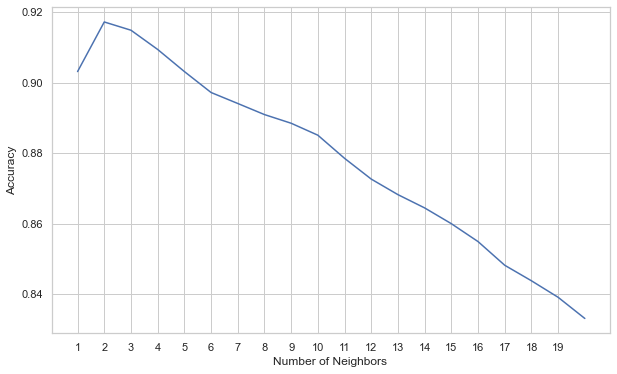

In [71]:
knn_p=KNeighborsRegressor()
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsRegressor(n_neighbors = i).fit(X_train,Y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.r2_score(Y_test, yhat)

loc = np.arange(1,20,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [72]:
knn=KNeighborsRegressor()
para={
        'n_neighbors':[2],
        'weights':['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute','auto'],
        'leaf_size':[30,40,50],
        'p':[2],
        'metric':['minkowski']
    
}
knn_gs= gs(estimator =knn, param_grid=para,cv=CV, n_jobs=5)
knn_gs.fit(X_train,Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=10, shuffle=True),
             estimator=KNeighborsRegressor(), n_jobs=5,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute',
                                       'auto'],
                         'leaf_size': [30, 40, 50], 'metric': ['minkowski'],
                         'n_neighbors': [2], 'p': [2],
                         'weights': ['uniform', 'distance']})

In [73]:
knn_gs.best_score_

0.896301857670166

In [74]:
knn_gs.best_estimator_

KNeighborsRegressor(leaf_size=40, n_neighbors=2, weights='distance')

In [75]:
dtree = DecisionTreeRegressor()
parameter_dtc_={    
            "splitter":["best","random"],
            "max_depth" : [7,8,9],
           "min_samples_leaf":[5,6,7,8,9],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[30,40,50,60,70] 
}
dtcR_gs= gs(estimator =dtree, param_grid=parameter_dtc_,cv=CV, n_jobs=5)
dtcR_gs.fit(X_train,Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=10, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=5,
             param_grid={'max_depth': [7, 8, 9],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [30, 40, 50, 60, 70],
                         'min_samples_leaf': [5, 6, 7, 8, 9],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4],
                         'splitter': ['best', 'random']})

In [76]:
dtcR_gs.best_score_

0.8066340981475746

In [77]:
dtcR_gs.best_estimator_

DecisionTreeRegressor(max_depth=7, max_features='auto', max_leaf_nodes=30,
                      min_samples_leaf=5, min_weight_fraction_leaf=0.1)

In [79]:
model1=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1,
             monotone_constraints='()', n_estimators=250, n_jobs=200,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
model1.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=250, n_jobs=200,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [80]:
scores1 = cross_val_score(model1, X_test, Y_test, scoring='r2', cv=10)
print('Mean R2 Score for XGB Regression :',mean(scores1),'\nStandard Deviation is : ',std(scores1))

Mean R2 Score for XGB Regression : 0.9325845199958562 
Standard Deviation is :  0.031117270448561957


In [81]:
model2=RandomForestRegressor(max_depth=9, n_estimators=250)
model2.fit(X_train,Y_train)

RandomForestRegressor(max_depth=9, n_estimators=250)

In [82]:
scores2 = cross_val_score(model2, X_test, Y_test, scoring='r2', cv=10)
print('Mean R2 Score for Random Forest Regressor :',mean(scores2),'\nStandard Deviation is : ',std(scores2))

Mean R2 Score for Random Forest Regressor : 0.9038202795174526 
Standard Deviation is :  0.04932362156980524


In [83]:
model3=KNeighborsRegressor(leaf_size=40, n_neighbors=2, weights='distance')
model3.fit(X_train,Y_train)

KNeighborsRegressor(leaf_size=40, n_neighbors=2, weights='distance')

In [84]:
scores3 = cross_val_score(model3, X_test, Y_test, scoring='r2', cv=10)
print('Mean R2 Score for KNN Regressor :',mean(scores3),'\nStandard Deviation is : ',std(scores3))

Mean R2 Score for KNN Regressor : 0.7703099893121697 
Standard Deviation is :  0.10631823370086936


In [85]:
model4=DecisionTreeRegressor(max_depth=7, max_features='auto', max_leaf_nodes=30,
                      min_samples_leaf=5, min_weight_fraction_leaf=0.1)
model4.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=7, max_features='auto', max_leaf_nodes=30,
                      min_samples_leaf=5, min_weight_fraction_leaf=0.1)

In [86]:
scores4 = cross_val_score(model4, X_test, Y_test, scoring='r2', cv=10)
print('Mean R2 Score for Decision Tree Regressor :',mean(scores4),'\nStandard Deviation is : ',std(scores4))

Mean R2 Score for Decision Tree Regressor : 0.8311149705930921 
Standard Deviation is :  0.04887422914218663


In [87]:
model5=LinearRegression()
model5.fit(X_train,Y_train)

LinearRegression()

In [88]:
scores5 = cross_val_score(model5, X_test, Y_test, scoring='r2', cv=10)
print('Mean R2 Score for Linear Regression :',mean(scores5),'\nStandard Deviation is : ',std(scores5))

Mean R2 Score for Linear Regression : 0.4577348201076344 
Standard Deviation is :  0.04962366372171507


In [89]:
prediction1=model1.predict(X_test)
prediction2=model2.predict(X_test)
prediction3=model3.predict(X_test)
prediction4=model4.predict(X_test)
prediction5=model5.predict(X_test)

XGB Regression


(3545.9375, 35224.60009765625, 1544.376220703125, 33223.038818359375)

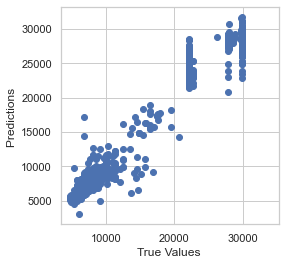

In [90]:
print('\033[1m'+'XGB Regression'+'\033[1m')
g=plt.scatter(Y_test, prediction1)
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

Random Forest Regression


(3545.9375, 31113.3125, 3832.7055758512074, 31400.080575851207)

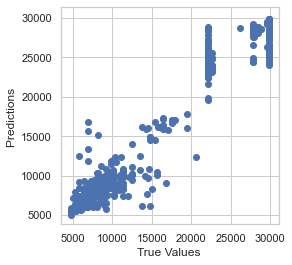

In [91]:
print('\033[1m'+'Random Forest Regression'+'\033[1m')
g=plt.scatter(Y_test, prediction2)
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

KNN Regression


(3545.9375, 31113.3125, 4002.0344314655767, 31569.409431465578)

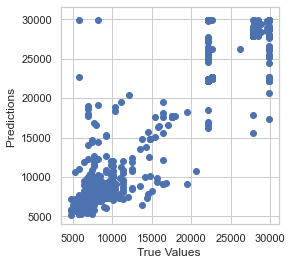

In [92]:
print('\033[1m'+'KNN Regression'+'\033[1m')
g=plt.scatter(Y_test, prediction3)
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

Decision Tree


(3545.9375, 31113.3125, 4999.642049088359, 32567.01704908836)

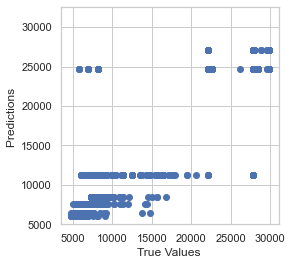

In [93]:
print('\033[1m'+'Decision Tree'+'\033[1m')
g=plt.scatter(Y_test, prediction4)
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

Linear Regression


(3545.9375, 32740.17013912629, -904.9289606299224, 28289.30367849637)

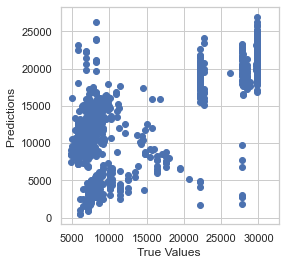

In [94]:
print('\033[1m'+'Linear Regression'+'\033[1m')
g=plt.scatter(Y_test, prediction5)
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

Out of all the Regression models XGB Regressor has performed well as it has good r2 score and good fit

In [95]:
#saving the model
Flight_Ticket_pricing_Model= pickle.dumps(model1)